In [246]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

# Convolutional Neural Networks
When thinking about convolution the first thing that comes to my mind as someone with a background in stochastics is taking the sum of random variables.
An easy example would be to consider two fair six sided dice and look at the distribution of the sum of those.
Let therefore $X$ and $Y$ be two independent random variables which represent the two dice, i.e.
$\mathbb{P}(X = i) = \mathbb{P}(Y = i) = \frac{1}{6}$ for all $i=1,...,6$. Then both, $X$ and $Y$ have a discrete uniform distribution.

## Convolution of images with kernes from scratch

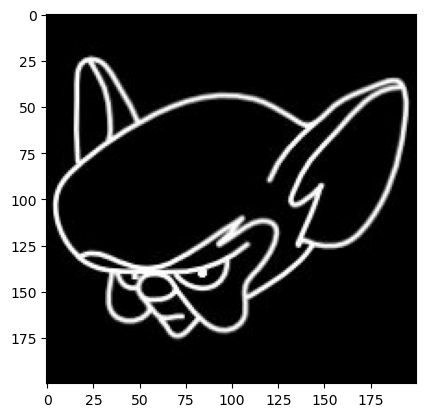

In [247]:
img = ((255 - plt.imread('Brain.jpg'))/255)[:,:,0]
plt.imshow(img,cmap='gray')

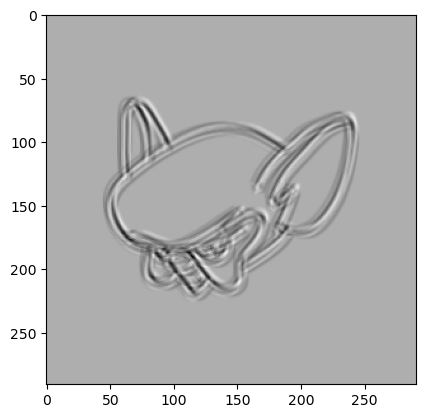

In [415]:
n = 10
conv = nn.Conv2d(in_channels= 1, out_channels= 1, kernel_size= n,padding= 50)
t_img = torch.tensor([[img]]).type(torch.float)
z = conv(t_img)
plt.imshow(z[0,0,:,:].detach().numpy(),cmap = 'gray')

In [384]:
print(torch.zeros(1,1,5,5).shape)
print(torch.tensor([[img]]).shape)
print(torch.max(t_img))


torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 200, 200])
tensor(1.)


tensor([[[[0., 0., 0., 1.],
          [0., 0., 0., 1.],
          [0., 0., 0., 1.],
          [0., 0., 1., 1.]]]])


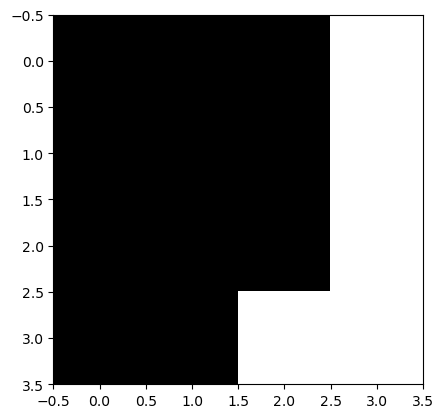

In [286]:
test = torch.zeros(1,1,4,4)
test[:,:,:,-1] = 1
test[:,:,-1,-2] = 1
print(test)
kern = torch.tensor([[[[1,1],
                       [1,1]]]])
plt.imshow(test[0,0,:,:],cmap='gray')

In [287]:
print(test[0,0,:,:],'\n',kern)

tensor([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 1.]]) 
 tensor([[[[1, 1],
          [1, 1]]]])


In [428]:
def conv2d(img, kern, stride = 1, padding = 0):
    n_img, m_img = img.size()[2:]
    n_kern,m_kern = kern.size()[2:]
    res = torch.zeros(1,1,int((n_img-n_kern)/stride+1),int((m_img-m_kern)/stride+1))
    for j in range(0,m_img-m_kern+1,stride):
        for i in range(0,n_img-n_kern+1,stride):
            res[0,0,int(i/stride),int(j/stride)] = torch.sum(torch.mul(kern[0,0,:,:],img[0,0,i:i+m_kern,j:j+n_kern])).item()
    n_res, m_res = res.size()[2:]
    pad = torch.zeros(1,1,n_res + 2*padding ,m_res + 2*padding)
    pad[:,:,padding:n_res+padding,padding:m_res+padding] = res
    return pad

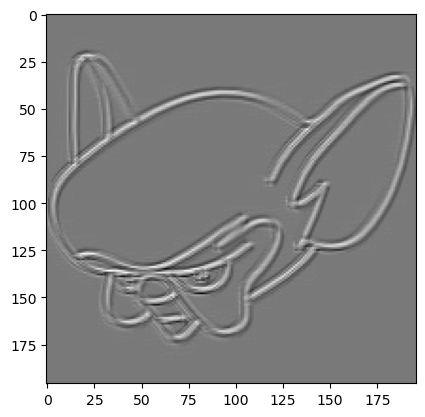

In [435]:
kern = 1/16*torch.tensor([[[[1,2,1],
                       [ 2,4,2],
                       [1,2,1]]]])
kern = torch.randn(1,1,5,5)
#plt.subplot(1,2,2)
#plt.imshow(img, cmap = 'gray')
#plt.subplot(2,2,2)
plt.imshow(conv2d(t_img,kern,1)[0,0,:,:],cmap = 'gray')

In [418]:
torch.zeros(1,1,2,2)
print(conv2d(t_img,kern).size(), kern.size())

torch.Size([1, 1, 198, 198]) torch.Size([1, 1, 3, 3])
